In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import random
import time
import numpy as np

In [122]:
df = pd.read_csv("/content/drive/MyDrive/DATA_SCIENCE_PROJECT/data_v2_full.csv", sep = ';', decimal=",")

In [123]:
df.shape

(3560, 26)

In [124]:
df.columns

Index(['date', 'entry', 'rlm', 'slp', 'day_of_year', 'day_of_week', 'holiday',
       'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration'],
      dtype='object')

In [125]:
df.isnull().any()

,0
date,False
entry,False
rlm,False
slp,False
day_of_year,False
day_of_week,False
holiday,False
weathercode,False
temperature_2m_max,False
temperature_2m_min,False


In [126]:
print(df.dtypes)

date                           object
entry                         float64
rlm                           float64
slp                           float64
day_of_year                     int64
day_of_week                     int64
holiday                         int64
weathercode                     int64
temperature_2m_max             object
temperature_2m_min             object
temperature_2m_mean            object
apparent_temperature_max       object
apparent_temperature_min       object
apparent_temperature_mean      object
sunrise                         int64
sunset                          int64
daylight_duration              object
sunshine_duration              object
rain_sum                       object
snowfall_sum                   object
precipitation_hours            object
windspeed_10m_max              object
windgusts_10m_max              object
winddirection_10m_dominant      int64
shortwave_radiation_sum        object
et0_fao_evapotranspiration     object
dtype: objec

In [127]:
df['date']= pd.to_datetime(df['date'])
df["date"] = df["date"].dt.year
df = df.rename(columns={"date": "year"})
df = df.sort_values(by=["year", "day_of_year"])

In [128]:
X = df.drop(columns=["entry", "rlm", "slp"])
y = df["slp"]

In [129]:
print(X.shape)
print(y.shape)

(3560, 23)
(3560,)


In [130]:
print(y.head())

0    1.935724e+06
1    2.410158e+06
2    3.009970e+06
3    3.201452e+06
4    3.169938e+06
Name: slp, dtype: float64


In [131]:
X.head()
X.columns

Index(['year', 'day_of_year', 'day_of_week', 'holiday', 'weathercode',
       'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'sunrise', 'sunset', 'daylight_duration',
       'sunshine_duration', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
       'windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration'],
      dtype='object')

In [132]:
random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [203]:
X_train.head()

,year,day_of_year,day_of_week,holiday,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,...,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2016,1,4,1,3,4.3,0.1,2.4,2.2,-3.2,...,27973.34,17706.46,0.0,0.0,0.0,9.0,18.4,208,2.64,0.21
1,2016,2,5,0,3,2.5,-5.3,-1.5,-0.7,-11.9,...,28047.14,2501.06,0.0,0.0,0.0,24.0,48.2,97,1.34,0.5
2,2016,3,6,0,3,-5.4,-8.4,-6.8,-11.8,-14.8,...,28127.21,21285.25,0.0,0.0,0.0,21.5,44.3,102,3.38,0.68
3,2016,4,0,0,3,-3.5,-7.9,-5.7,-9.1,-14.1,...,28213.34,9701.3,0.0,0.0,0.0,18.9,39.2,97,2.47,0.61
4,2016,5,1,0,73,-5.2,-6.4,-5.8,-10.6,-12.1,...,28305.35,0.0,0.0,2.45,14.0,16.2,33.5,84,1.0,0.46


In [208]:
X_train.iloc[-1:]

,year,day_of_year,day_of_week,holiday,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,...,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
2847,2023,291,2,0,3,11.8,0.5,6.5,8.5,-3.0,...,37765.81,31937.94,0.0,0.0,0.0,17.7,33.1,103,9.53,1.36


In [204]:
X_test.head()

,year,day_of_year,day_of_week,holiday,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,...,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
2848,2023,292,3,0,61,8.1,6.6,7.4,5.4,2.7,...,37528.0,0.0,8.6,0.0,16.0,18.6,35.6,91,1.48,0.46
2849,2023,293,4,0,53,7.9,5.7,6.6,5.6,0.6,...,37291.5,0.0,5.3,0.0,16.0,26.7,54.0,80,1.34,0.27
2850,2023,294,5,0,51,17.7,6.8,11.5,16.3,4.5,...,37056.51,23748.58,0.3,0.0,3.0,19.3,48.2,181,6.5,1.08
2851,2023,295,6,0,3,16.1,9.4,12.7,13.6,7.6,...,36823.21,30572.26,0.0,0.0,0.0,17.4,35.3,218,7.44,1.29
2852,2023,296,0,0,51,15.2,7.1,11.1,14.9,5.4,...,36591.8,31182.66,0.2,0.0,2.0,11.8,20.2,178,8.07,1.04


In [133]:
print(X_train.shape)
print(X_test.shape)

(2848, 23)
(712, 23)


In [134]:
feature_names = X.columns

In [135]:
X_train.dtypes

,0
year,int32
day_of_year,int64
day_of_week,int64
holiday,int64
weathercode,int64
temperature_2m_max,object
temperature_2m_min,object
temperature_2m_mean,object
apparent_temperature_max,object
apparent_temperature_min,object


In [189]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [191]:
important_features = pd.Series(data=forest.feature_importances_, index=feature_names)
important_features = important_features.sort_values(ascending=False)
print(important_features)

apparent_temperature_mean     0.458994
temperature_2m_mean           0.300702
apparent_temperature_max      0.103360
temperature_2m_max            0.092699
day_of_year                   0.011194
sunrise                       0.008858
year                          0.004234
daylight_duration             0.003398
sunset                        0.002265
et0_fao_evapotranspiration    0.002200
shortwave_radiation_sum       0.002073
apparent_temperature_min      0.001894
sunshine_duration             0.001198
winddirection_10m_dominant    0.001187
temperature_2m_min            0.001136
windgusts_10m_max             0.000960
windspeed_10m_max             0.000858
day_of_week                   0.000842
precipitation_hours           0.000668
rain_sum                      0.000545
weathercode                   0.000420
holiday                       0.000186
snowfall_sum                  0.000130
dtype: float64


##Simple bar plot using features importance

<Axes: title={'center': 'Feature Importance in Random Forest'}>

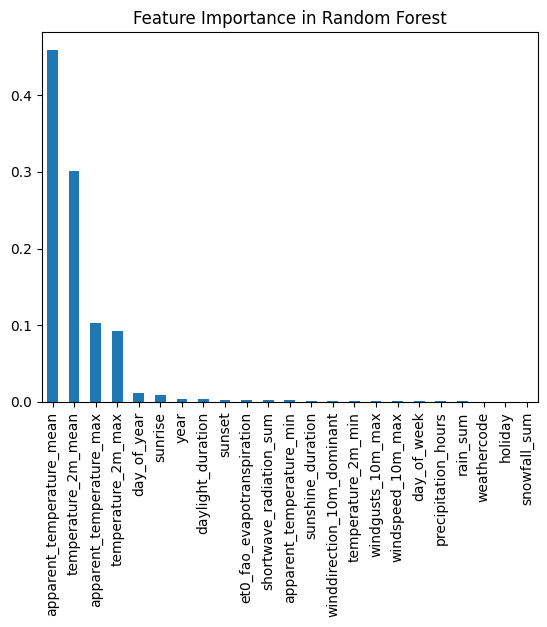

In [192]:
important_features.plot(kind="bar", title = "Feature Importance in Random Forest")

##Feature importance based on mean decrease in impurity (MDI)

In [193]:
individual_trees=forest.estimator_
manual_feature_importances = np.mean([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [194]:
np.allclose(manual_feature_importances, forest.feature_importances_)

True

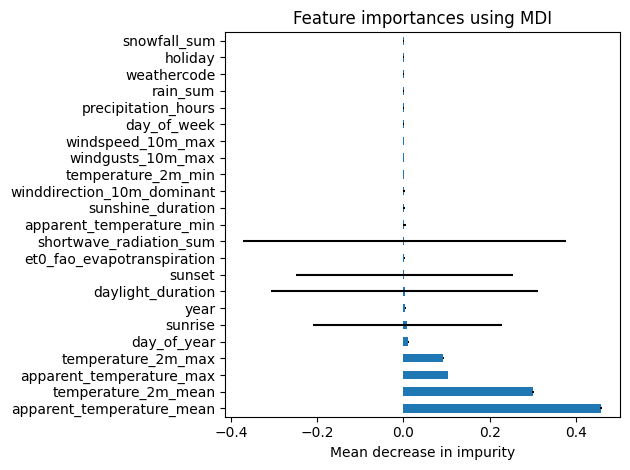

In [198]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
important_features.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

Standard deviation (SD) is a statistical measure that tells you how spread out the values are from their mean (average).



- The most important feature is clearly apparent_temperature_mean (huge bar).

- Other strong features include apparent_temperature_max, temperature_2m_mean, and temperature_2m_max.

- Features like sunrise, sunset, daylight_duration, rain_sum, windspeed_10m_max, etc., have very low importance.

- Calendar features (year, day_of_year, day_of_week, holiday) have almost no impact.

This tells us that temperature-related features dominate gas consumption prediction, which makes sense for heating demand.

##Feature importance based on feature permutation

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [199]:
from sklearn.inspection import permutation_importance

In [200]:
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

In [201]:
forest_importances = pd.Series(result.importances_mean, index=feature_names)

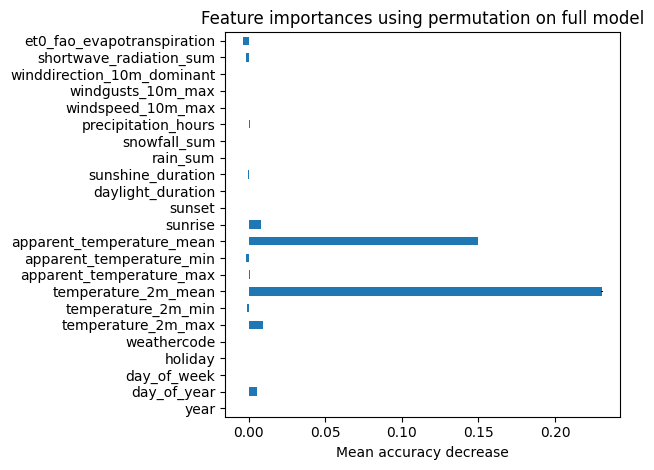

In [202]:
fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_xlabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Differences between MDI and permutation importance
1. Different measurement approaches
MDI (Mean Decrease in Impurity): Measures how much each feature reduces impurity (e.g., Gini) when used in splits. It reflects how often and how effectively a feature is used in the tree structure.
Permutation importance: Measures how much model performance (accuracy) decreases when a feature’s values are randomly shuffled. It reflects the feature’s actual predictive contribution.
2. Why the results differ
Order swap:
MDI: apparent_temperature_mean (0.45) > temperature_2m_mean (0.28)
Permutation: temperature_2m_mean (0.225) > apparent_temperature_mean (0.145)
This suggests:
apparent_temperature_mean is used more in splits (MDI), but when shuffled, temperature_2m_mean has a larger impact on accuracy.
temperature_2m_mean may be more directly predictive, while apparent_temperature_mean may be correlated and used as a proxy.
Magnitude differences:
apparent_temperature_max and temperature_2m_max are much smaller in permutation (approx.0.015 vs approx.0.12 and approx. 0.08).
This suggests they are used in splits but dont add much unique predictive power beyond the mean features.
Feature appearance:
sunrise appears in permutation (approx. 0.01) but not prominently in MDI, indicating it adds some predictive value that MDI didnt capture.
3. Why this happens
MDI can be biased toward features with more categories or splits.
MDI doesnt account for feature correlation; permutation does.
Permutation measures actual impact on model performance, not just tree usage.
4. Which to trust?
Permutation importance is generally preferred because it:
Measures actual predictive contribution
Accounts for feature interactions and correlations
Is less biased by feature characteristics
Recommendation: Use temperature_2m_mean and apparent_temperature_mean as your primary features, with temperature_2m_max as a secondary feature. The other features appear to add little predictive value.

Why error bars matter?

- Large error bars: importance varies a lot across trees (less stable)
- Small error bars: consistent importance (more stable)
- Error bars crossing zero: some trees assign negative/zero importance (unreliable)